In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup
import requests
import re

In [3]:
### Download Data

url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [4]:
### Get Data

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]

In [5]:
### Store the Data

# create a empty list for storing
# movie information
list = []
 
# Iterating over movies to extract
# each movie's details
for index in range(0, len(movies)):
   
    # Separating  movie into: 'place',
    # 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
     
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    list.append(data)

In [6]:
# Print
for movie in list:
    print(movie['place'], ',', movie['movie_title'], ',', movie['year'],
          ',', movie['star_cast'], ',', movie['rating'])

1 , The Shawshank Redemption , 1994 , Frank Darabont (dir.), Tim Robbins, Morgan Freeman , 9.220540194934102
2 , The Godfather , 1972 , Francis Ford Coppola (dir.), Marlon Brando, Al Pacino , 9.147270067244452
3 , The Godfather: Part II , 1974 , Francis Ford Coppola (dir.), Al Pacino, Robert De Niro , 8.980517544157319
4 , The Dark Knight , 2008 , Christopher Nolan (dir.), Christian Bale, Heath Ledger , 8.973119964848593
5 , 12 Angry Men , 1957 , Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb , 8.93926641290521
6 , Schindler's List , 1993 , Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes , 8.91114406487024
7 , The Lord of the Rings: The Return of the King , 2003 , Peter Jackson (dir.), Elijah Wood, Viggo Mortensen , 8.888469730281242
8 , Pulp Fiction , 1994 , Quentin Tarantino (dir.), John Travolta, Uma Thurman , 8.835966443267345
9 , Il buono, il brutto, il cattivo , 1966 , Sergio Leone (dir.), Clint Eastwood, Eli Wallach , 8.786244634859031
1 ,  The Lord of the Rings: The Fellowsh

In [7]:
df = pd.DataFrame(list)
df

,movie_title,year,place,star_cast,rating,vote,link
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.220540194934102,None,/title/tt0111161/
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.147270067244452,None,/title/tt0068646/
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.980517544157319,None,/title/tt0071562/
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.973119964848593,None,/title/tt0468569/
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.93926641290521,None,/title/tt0050083/
...,...,...,...,...,...,...,...
245,"Paris, Texas",1984,246,"Wim Wenders (dir.), Harry Dean Stanton, Nastas...",8.022865016745023,None,/title/tt0087884/
246,The Princess Bride,1987,247,"Rob Reiner (dir.), Cary Elwes, Mandy Patinkin",8.022695049327574,None,/title/tt0093779/
247,Le notti di Cabiria,1957,248,"Federico Fellini (dir.), Giulietta Masina, Fra...",8.020797460290028,None,/title/tt0050783/
248,Du rififi chez les hommes,1955,249,"Jules Dassin (dir.), Jean Servais, Carl Möhner",8.019812131913397,None,/title/tt0048021/


In [8]:
df.head(11)

,movie_title,year,place,star_cast,rating,vote,link
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.220540194934102,None,/title/tt0111161/
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.147270067244452,None,/title/tt0068646/
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.980517544157319,None,/title/tt0071562/
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.973119964848593,None,/title/tt0468569/
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.93926641290521,None,/title/tt0050083/
5,Schindler's List,1993,6,"Steven Spielberg (dir.), Liam Neeson, Ralph Fi...",8.91114406487024,None,/title/tt0108052/
6,The Lord of the Rings: The Return of the King,2003,7,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",8.888469730281242,None,/title/tt0167260/
7,Pulp Fiction,1994,8,"Quentin Tarantino (dir.), John Travolta, Uma T...",8.835966443267345,None,/title/tt0110912/
8,"Il buono, il brutto, il cattivo",1966,9,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach",8.786244634859031,None,/title/tt0060196/
9,The Lord of the Rings: The Fellowship of the ...,2001,1,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",8.778622774453531,None,/title/tt0120737/


In [9]:
df[['Director','Actor1','Actor2']] = df['star_cast'].str.split(',',expand=True)
df.head()

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.220540194934102,None,/title/tt0111161/,Frank Darabont (dir.),Tim Robbins,Morgan Freeman
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.147270067244452,None,/title/tt0068646/,Francis Ford Coppola (dir.),Marlon Brando,Al Pacino
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.980517544157319,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.973119964848593,None,/title/tt0468569/,Christopher Nolan (dir.),Christian Bale,Heath Ledger
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.93926641290521,None,/title/tt0050083/,Sidney Lumet (dir.),Henry Fonda,Lee J. Cobb


In [10]:
df['rating'] = pd.to_numeric(df['rating'])

In [11]:
df['rating'] = df['rating'].round(2)

In [12]:
df.head(5)

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.22,None,/title/tt0111161/,Frank Darabont (dir.),Tim Robbins,Morgan Freeman
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.15,None,/title/tt0068646/,Francis Ford Coppola (dir.),Marlon Brando,Al Pacino
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.98,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.97,None,/title/tt0468569/,Christopher Nolan (dir.),Christian Bale,Heath Ledger
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.94,None,/title/tt0050083/,Sidney Lumet (dir.),Henry Fonda,Lee J. Cobb


In [13]:
df['year'].value_counts()

1995    8
1957    7
2000    6
1997    6
2004    6
       ..
1958    1
1946    1
1971    1
1926    1
1969    1
Name: year, Length: 86, dtype: int64

In [14]:
df['year'].min()

'1921'

In [15]:
df['year'].max()

'2021'

In [16]:
df['year'] = pd.to_numeric(df['year'])
df.head()

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.22,None,/title/tt0111161/,Frank Darabont (dir.),Tim Robbins,Morgan Freeman
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.15,None,/title/tt0068646/,Francis Ford Coppola (dir.),Marlon Brando,Al Pacino
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.98,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.97,None,/title/tt0468569/,Christopher Nolan (dir.),Christian Bale,Heath Ledger
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.94,None,/title/tt0050083/,Sidney Lumet (dir.),Henry Fonda,Lee J. Cobb


In [17]:
bins = [1920,1931,1941,1951,1961,1971,1981,1991,2001,2011,2021]

labels = ['First Decade', 'Second Decade', 'Third Decade', 'Fourth Decade', 'Fifth Decade', 'Sixth Decade', 
          'Seventh Decade', 'Eight Decade', 'Ninth Decade', 'Tenth Decade']

df['year_category'] = pd.cut(df['year'], bins=bins, labels=labels)

In [18]:
df.head()

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2,year_category
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.22,None,/title/tt0111161/,Frank Darabont (dir.),Tim Robbins,Morgan Freeman,Eight Decade
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.15,None,/title/tt0068646/,Francis Ford Coppola (dir.),Marlon Brando,Al Pacino,Sixth Decade
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.98,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro,Sixth Decade
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.97,None,/title/tt0468569/,Christopher Nolan (dir.),Christian Bale,Heath Ledger,Ninth Decade
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.94,None,/title/tt0050083/,Sidney Lumet (dir.),Henry Fonda,Lee J. Cobb,Fourth Decade


In [19]:
df['year_category'].value_counts()

Eight Decade      49
Ninth Decade      44
Tenth Decade      41
Seventh Decade    26
Fourth Decade     26
Sixth Decade      23
Fifth Decade      16
Third Decade      10
First Decade       8
Second Decade      7
Name: year_category, dtype: int64

In [20]:
df.tail()

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2,year_category
245,"Paris, Texas",1984,246,"Wim Wenders (dir.), Harry Dean Stanton, Nastas...",8.02,None,/title/tt0087884/,Wim Wenders (dir.),Harry Dean Stanton,Nastassja Kinski,Seventh Decade
246,The Princess Bride,1987,247,"Rob Reiner (dir.), Cary Elwes, Mandy Patinkin",8.02,None,/title/tt0093779/,Rob Reiner (dir.),Cary Elwes,Mandy Patinkin,Seventh Decade
247,Le notti di Cabiria,1957,248,"Federico Fellini (dir.), Giulietta Masina, Fra...",8.02,None,/title/tt0050783/,Federico Fellini (dir.),Giulietta Masina,François Périer,Fourth Decade
248,Du rififi chez les hommes,1955,249,"Jules Dassin (dir.), Jean Servais, Carl Möhner",8.02,None,/title/tt0048021/,Jules Dassin (dir.),Jean Servais,Carl Möhner,Fourth Decade
249,Ratsasan,2018,250,"Ram Kumar (dir.), Vishnu Vishal, Amala Paul",8.02,None,/title/tt7060344/,Ram Kumar (dir.),Vishnu Vishal,Amala Paul,Tenth Decade


In [21]:
df['rating'].min()

8.02

In [22]:
df['rating'].max()

9.22

In [23]:
df['rating'].value_counts()

8.11    15
8.06    11
8.04    10
8.08     9
8.24     9
        ..
8.89     1
8.69     1
8.61     1
8.28     1
8.75     1
Name: rating, Length: 71, dtype: int64

In [24]:
bins1 = [0,1,2,3,4,5,6,7,8,9,10]

labels1 = ['awful', 'yikes', 'bleh', 'so so', 'average', 'decent', 
          'Good', 'very good', 'awesome', 'elite']

df['rating_category'] = pd.cut(df['rating'], bins=bins1, labels=labels1)

In [25]:
df.head()

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2,year_category,rating_category
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.22,None,/title/tt0111161/,Frank Darabont (dir.),Tim Robbins,Morgan Freeman,Eight Decade,elite
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.15,None,/title/tt0068646/,Francis Ford Coppola (dir.),Marlon Brando,Al Pacino,Sixth Decade,elite
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.98,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro,Sixth Decade,awesome
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.97,None,/title/tt0468569/,Christopher Nolan (dir.),Christian Bale,Heath Ledger,Ninth Decade,awesome
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.94,None,/title/tt0050083/,Sidney Lumet (dir.),Henry Fonda,Lee J. Cobb,Fourth Decade,awesome


In [26]:
df.tail()

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2,year_category,rating_category
245,"Paris, Texas",1984,246,"Wim Wenders (dir.), Harry Dean Stanton, Nastas...",8.02,None,/title/tt0087884/,Wim Wenders (dir.),Harry Dean Stanton,Nastassja Kinski,Seventh Decade,awesome
246,The Princess Bride,1987,247,"Rob Reiner (dir.), Cary Elwes, Mandy Patinkin",8.02,None,/title/tt0093779/,Rob Reiner (dir.),Cary Elwes,Mandy Patinkin,Seventh Decade,awesome
247,Le notti di Cabiria,1957,248,"Federico Fellini (dir.), Giulietta Masina, Fra...",8.02,None,/title/tt0050783/,Federico Fellini (dir.),Giulietta Masina,François Périer,Fourth Decade,awesome
248,Du rififi chez les hommes,1955,249,"Jules Dassin (dir.), Jean Servais, Carl Möhner",8.02,None,/title/tt0048021/,Jules Dassin (dir.),Jean Servais,Carl Möhner,Fourth Decade,awesome
249,Ratsasan,2018,250,"Ram Kumar (dir.), Vishnu Vishal, Amala Paul",8.02,None,/title/tt7060344/,Ram Kumar (dir.),Vishnu Vishal,Amala Paul,Tenth Decade,awesome


In [27]:
df['rating_category'].value_counts()

awesome      248
elite          2
very good      0
Good           0
decent         0
average        0
so so          0
bleh           0
yikes          0
awful          0
Name: rating_category, dtype: int64

In [28]:
duplicate_actors = df[df.duplicated(subset=['Actor1','Actor2'], keep=False)]
duplicate_actors

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2,year_category,rating_category
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.98,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro,Sixth Decade,awesome
9,The Lord of the Rings: The Fellowship of the ...,2001,1,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",8.78,None,/title/tt0120737/,Peter Jackson (dir.),Elijah Wood,Ian McKellen,Eight Decade,awesome
13,The Lord of the Rings: The Two Towers,2002,14,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",8.70,None,/title/tt0167261/,Peter Jackson (dir.),Elijah Wood,Ian McKellen,Ninth Decade,awesome
14,Star Wars: Episode V - The Empire Strikes Back,1980,15,"Irvin Kershner (dir.), Mark Hamill, Harrison Ford",8.69,None,/title/tt0080684/,Irvin Kershner (dir.),Mark Hamill,Harrison Ford,Sixth Decade,awesome
24,Star Wars,1977,25,"George Lucas (dir.), Mark Hamill, Harrison Ford",8.55,None,/title/tt0076759/,George Lucas (dir.),Mark Hamill,Harrison Ford,Sixth Decade,awesome
38,Modern Times,1936,39,"Charles Chaplin (dir.), Charles Chaplin, Paule...",8.48,None,/title/tt0027977/,Charles Chaplin (dir.),Charles Chaplin,Paulette Goddard,Second Decade,awesome
55,The Great Dictator,1940,56,"Charles Chaplin (dir.), Charles Chaplin, Paule...",8.40,None,/title/tt0032553/,Charles Chaplin (dir.),Charles Chaplin,Paulette Goddard,Second Decade,awesome
80,Toy Story,1995,81,"John Lasseter (dir.), Tom Hanks, Tim Allen",8.30,None,/title/tt0114709/,John Lasseter (dir.),Tom Hanks,Tim Allen,Eight Decade,awesome
86,Star Wars: Episode VI - Return of the Jedi,1983,87,"Richard Marquand (dir.), Mark Hamill, Harrison...",8.27,None,/title/tt0086190/,Richard Marquand (dir.),Mark Hamill,Harrison Ford,Seventh Decade,awesome
92,Citizen Kane,1941,93,"Orson Welles (dir.), Orson Welles, Joseph Cotten",8.27,None,/title/tt0033467/,Orson Welles (dir.),Orson Welles,Joseph Cotten,Second Decade,awesome


In [29]:
duplicate_actors['Actor1'].value_counts()

 Mark Hamill        3
 Ethan Hawke        2
 Charles Chaplin    2
 Orson Welles       2
 Graham Chapman     2
 Tom Hanks          2
 Al Pacino          2
 Elijah Wood        2
Name: Actor1, dtype: int64

In [30]:
duplicate_actors['Actor2'].value_counts()

 Harrison Ford       3
 Joseph Cotten       2
 Tim Allen           2
 John Cleese         2
 Ian McKellen        2
 Paulette Goddard    2
 Robert De Niro      2
 Julie Delpy         2
Name: Actor2, dtype: int64

In [31]:
duplicate_actors['year_category'].value_counts()

Sixth Decade      5
Eight Decade      4
Ninth Decade      3
Second Decade     3
Seventh Decade    1
Third Decade      1
Tenth Decade      0
Fifth Decade      0
Fourth Decade     0
First Decade      0
Name: year_category, dtype: int64

In [32]:
duplicate_directors = df[df.duplicated(subset=['Director'], keep=False)]
duplicate_directors

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2,year_category,rating_category
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.22,None,/title/tt0111161/,Frank Darabont (dir.),Tim Robbins,Morgan Freeman,Eight Decade,elite
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.15,None,/title/tt0068646/,Francis Ford Coppola (dir.),Marlon Brando,Al Pacino,Sixth Decade,elite
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.98,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro,Sixth Decade,awesome
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.97,None,/title/tt0468569/,Christopher Nolan (dir.),Christian Bale,Heath Ledger,Ninth Decade,awesome
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.94,None,/title/tt0050083/,Sidney Lumet (dir.),Henry Fonda,Lee J. Cobb,Fourth Decade,awesome
...,...,...,...,...,...,...,...,...,...,...,...,...
237,Kaze no tani no Naushika,1984,238,"Hayao Miyazaki (dir.), Sumi Shimamoto, Mahito ...",8.03,None,/title/tt0087544/,Hayao Miyazaki (dir.),Sumi Shimamoto,Mahito Tsujimura,Seventh Decade,awesome
238,It Happened One Night,1934,239,"Frank Capra (dir.), Clark Gable, Claudette Col...",8.03,None,/title/tt0025316/,Frank Capra (dir.),Clark Gable,Claudette Colbert,Second Decade,awesome
240,Before Sunset,2004,241,"Richard Linklater (dir.), Ethan Hawke, Julie D...",8.03,None,/title/tt0381681/,Richard Linklater (dir.),Ethan Hawke,Julie Delpy,Ninth Decade,awesome
242,Fanny och Alexander,1982,243,"Ingmar Bergman (dir.), Bertil Guve, Pernilla A...",8.03,None,/title/tt0083922/,Ingmar Bergman (dir.),Bertil Guve,Pernilla Allwin,Seventh Decade,awesome


In [33]:
duplicate_directors['Director'].value_counts()

Martin Scorsese (dir.)         7
Stanley Kubrick (dir.)         7
Christopher Nolan (dir.)       7
Alfred Hitchcock (dir.)        6
Akira Kurosawa (dir.)          6
Steven Spielberg (dir.)        6
Billy Wilder (dir.)            5
Hayao Miyazaki (dir.)          5
Charles Chaplin (dir.)         5
Quentin Tarantino (dir.)       5
Ingmar Bergman (dir.)          5
Sergio Leone (dir.)            4
Francis Ford Coppola (dir.)    3
Peter Jackson (dir.)           3
David Fincher (dir.)           3
Ridley Scott (dir.)            3
Clint Eastwood (dir.)          3
Frank Capra (dir.)             3
Pete Docter (dir.)             3
Denis Villeneuve (dir.)        3
Rob Reiner (dir.)              2
Frank Darabont (dir.)          2
Lee Unkrich (dir.)             2
James Mangold (dir.)           2
Richard Linklater (dir.)       2
Guy Ritchie (dir.)             2
Robert Zemeckis (dir.)         2
Peter Weir (dir.)              2
Anthony Russo (dir.)           2
James Cameron (dir.)           2
Sam Mendes

In [34]:
df.head()

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2,year_category,rating_category
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.22,None,/title/tt0111161/,Frank Darabont (dir.),Tim Robbins,Morgan Freeman,Eight Decade,elite
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.15,None,/title/tt0068646/,Francis Ford Coppola (dir.),Marlon Brando,Al Pacino,Sixth Decade,elite
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.98,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro,Sixth Decade,awesome
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.97,None,/title/tt0468569/,Christopher Nolan (dir.),Christian Bale,Heath Ledger,Ninth Decade,awesome
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.94,None,/title/tt0050083/,Sidney Lumet (dir.),Henry Fonda,Lee J. Cobb,Fourth Decade,awesome


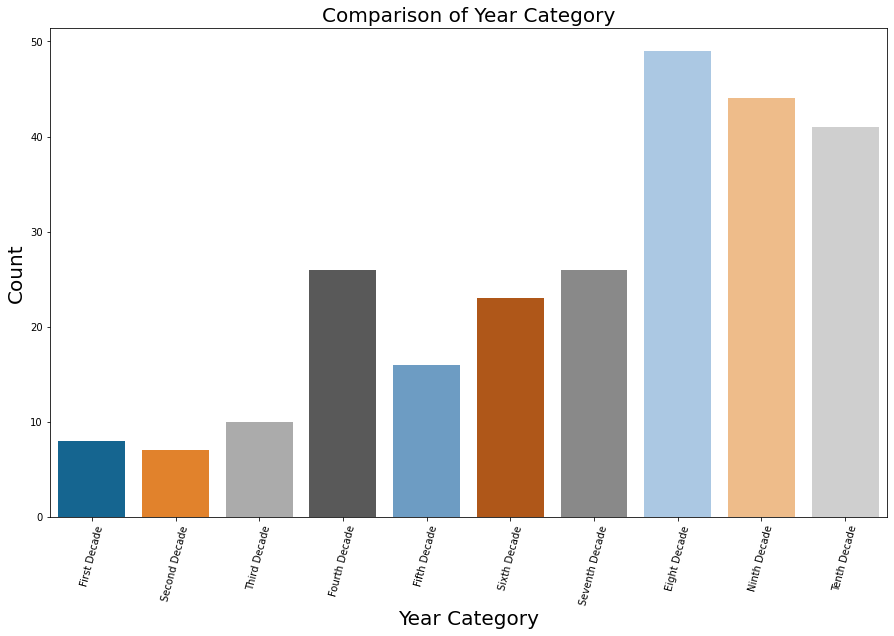

In [35]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data=df, x='year_category')
plt.title('Comparison of Year Category', fontweight = 30, fontsize = 20)
plt.xlabel('Year Category', fontweight = 30, fontsize = 20)
plt.ylabel('Count', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

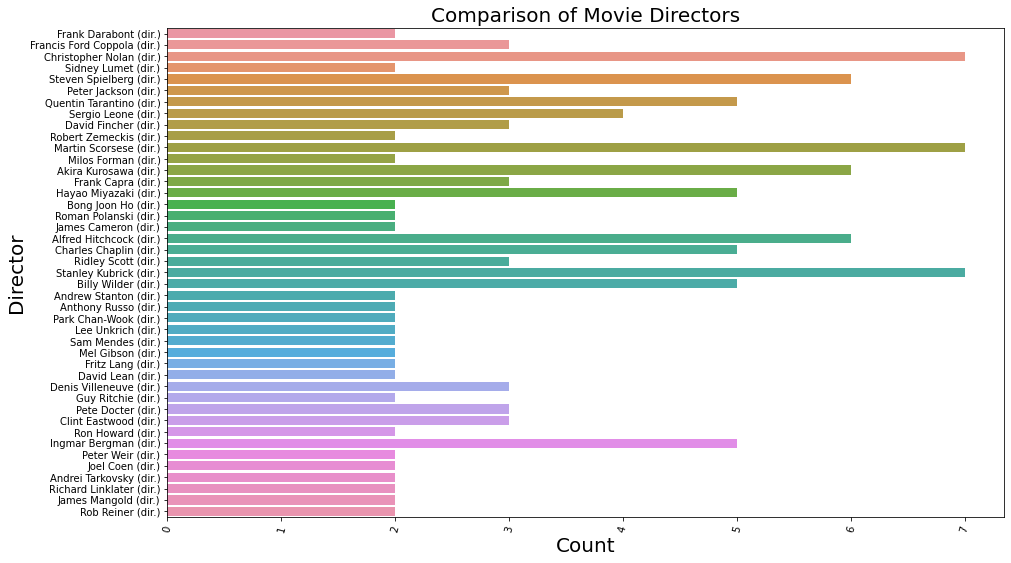

In [36]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data=duplicate_directors, y='Director')
plt.title('Comparison of Movie Directors', fontweight = 30, fontsize = 20)
plt.xlabel('Count', fontweight = 30, fontsize = 20)
plt.ylabel('Director', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

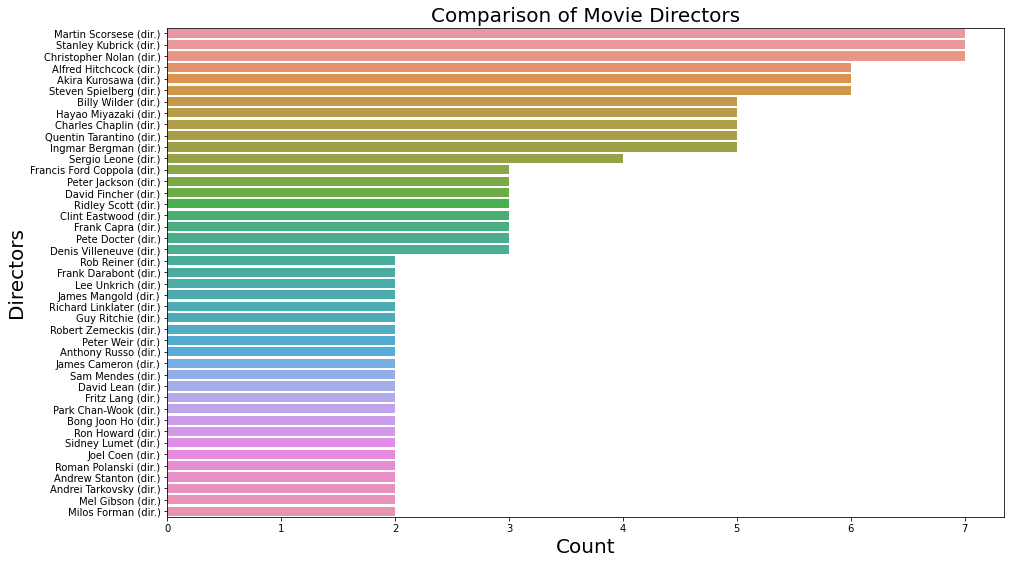

In [37]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data=duplicate_directors, y='Director', order = duplicate_directors['Director'].value_counts().index)
plt.title('Comparison of Movie Directors', fontweight = 30, fontsize = 20)
plt.xlabel('Count', fontweight = 30, fontsize = 20)
plt.ylabel('Directors', fontweight = 30, fontsize = 20)
plt.xticks
plt.show()

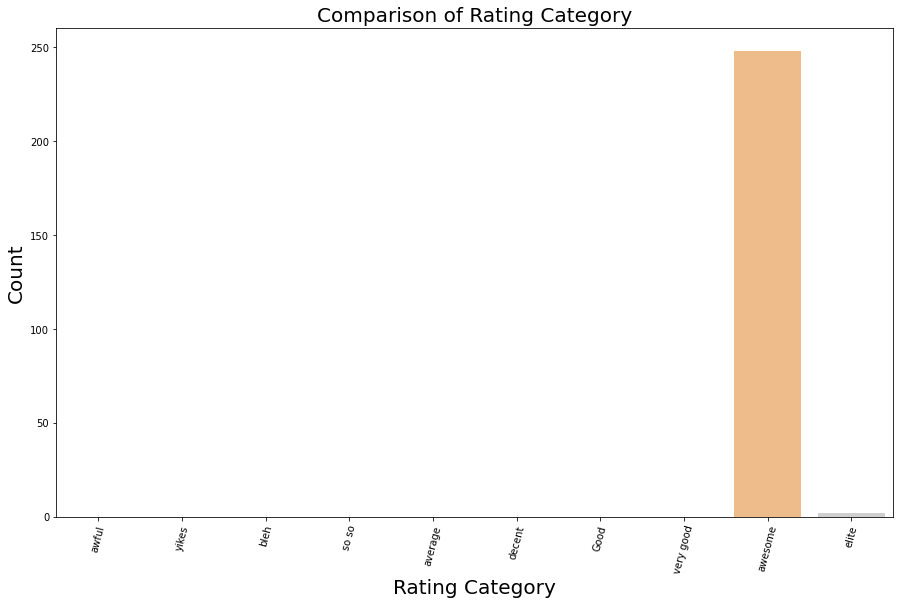

In [38]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data=df, x='rating_category')
plt.title('Comparison of Rating Category', fontweight = 30, fontsize = 20)
plt.xlabel('Rating Category', fontweight = 30, fontsize = 20)
plt.ylabel('Count', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

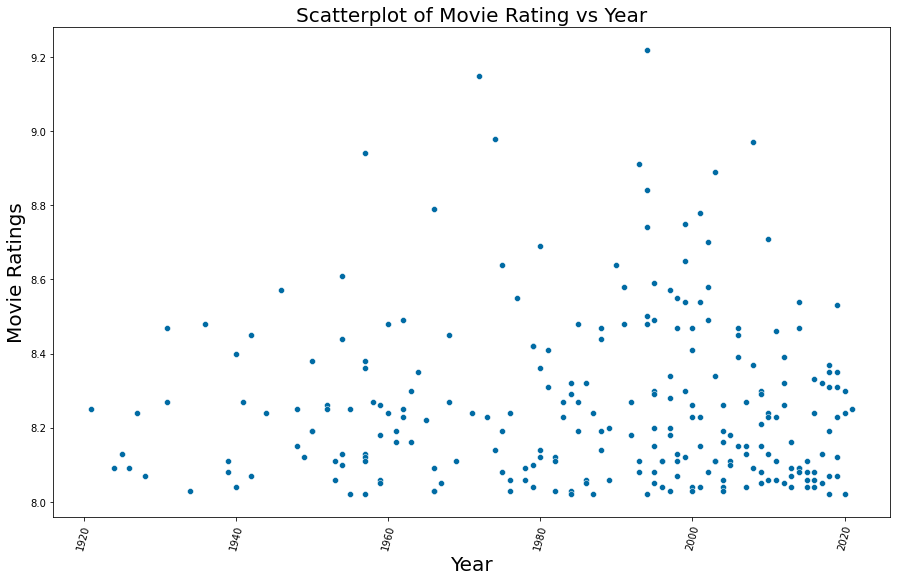

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')
sns.scatterplot(data=df, x='year', y='rating')
plt.title('Scatterplot of Movie Rating vs Year', fontweight = 30, fontsize = 20)
plt.xlabel('Year', fontweight = 30, fontsize = 20)
plt.ylabel('Movie Ratings', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

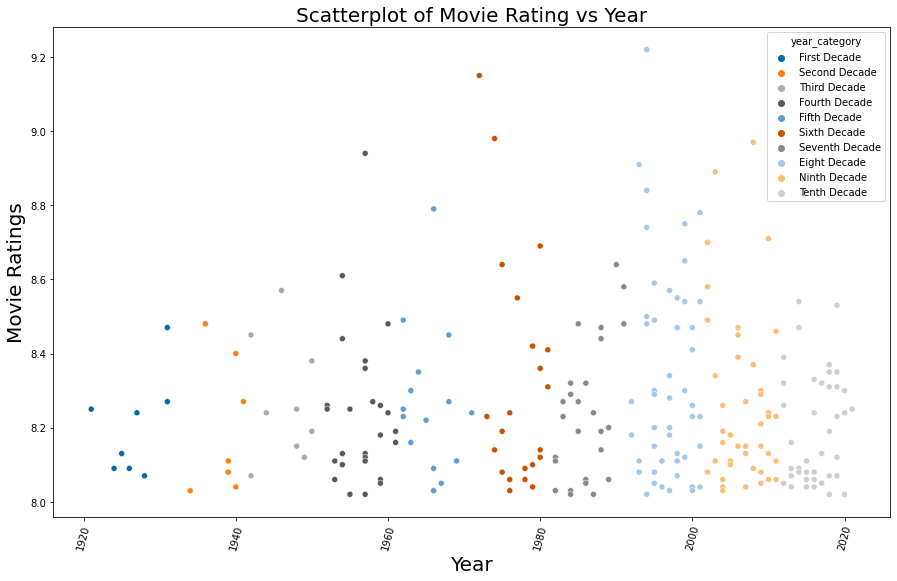

In [40]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')
sns.scatterplot(data=df, x='year', y='rating', hue='year_category')
plt.title('Scatterplot of Movie Rating vs Year', fontweight = 30, fontsize = 20)
plt.xlabel('Year', fontweight = 30, fontsize = 20)
plt.ylabel('Movie Ratings', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

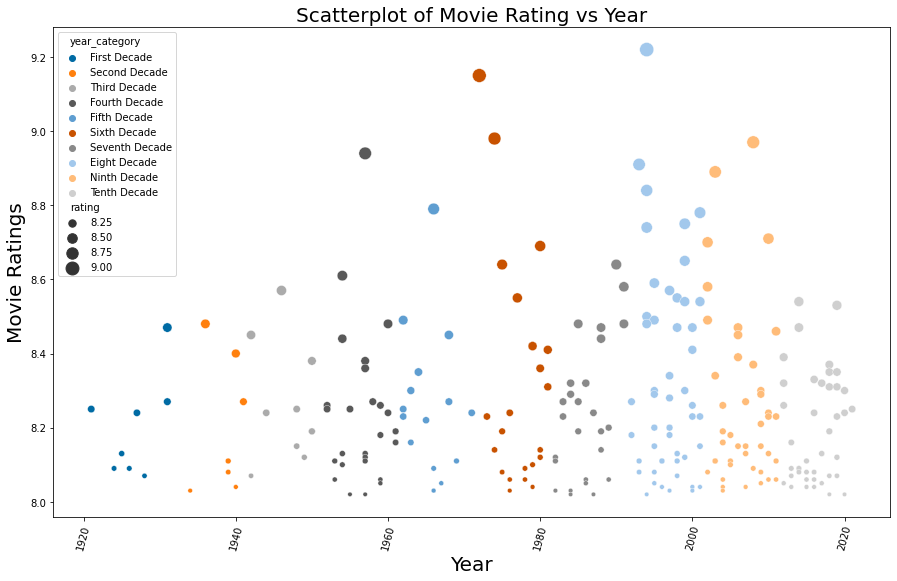

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')
sns.scatterplot(data=df, x='year', y='rating', hue='year_category', size='rating', sizes=(20, 200))
plt.title('Scatterplot of Movie Rating vs Year', fontweight = 30, fontsize = 20)
plt.xlabel('Year', fontweight = 30, fontsize = 20)
plt.ylabel('Movie Ratings', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

In [42]:
Top_20 = df.head(20)
Top_20

,movie_title,year,place,star_cast,rating,vote,link,Director,Actor1,Actor2,year_category,rating_category
0,The Shawshank Redemption,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.22,None,/title/tt0111161/,Frank Darabont (dir.),Tim Robbins,Morgan Freeman,Eight Decade,elite
1,The Godfather,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.15,None,/title/tt0068646/,Francis Ford Coppola (dir.),Marlon Brando,Al Pacino,Sixth Decade,elite
2,The Godfather: Part II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.98,None,/title/tt0071562/,Francis Ford Coppola (dir.),Al Pacino,Robert De Niro,Sixth Decade,awesome
3,The Dark Knight,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.97,None,/title/tt0468569/,Christopher Nolan (dir.),Christian Bale,Heath Ledger,Ninth Decade,awesome
4,12 Angry Men,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.94,None,/title/tt0050083/,Sidney Lumet (dir.),Henry Fonda,Lee J. Cobb,Fourth Decade,awesome
5,Schindler's List,1993,6,"Steven Spielberg (dir.), Liam Neeson, Ralph Fi...",8.91,None,/title/tt0108052/,Steven Spielberg (dir.),Liam Neeson,Ralph Fiennes,Eight Decade,awesome
6,The Lord of the Rings: The Return of the King,2003,7,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",8.89,None,/title/tt0167260/,Peter Jackson (dir.),Elijah Wood,Viggo Mortensen,Ninth Decade,awesome
7,Pulp Fiction,1994,8,"Quentin Tarantino (dir.), John Travolta, Uma T...",8.84,None,/title/tt0110912/,Quentin Tarantino (dir.),John Travolta,Uma Thurman,Eight Decade,awesome
8,"Il buono, il brutto, il cattivo",1966,9,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach",8.79,None,/title/tt0060196/,Sergio Leone (dir.),Clint Eastwood,Eli Wallach,Fifth Decade,awesome
9,The Lord of the Rings: The Fellowship of the ...,2001,1,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",8.78,None,/title/tt0120737/,Peter Jackson (dir.),Elijah Wood,Ian McKellen,Eight Decade,awesome


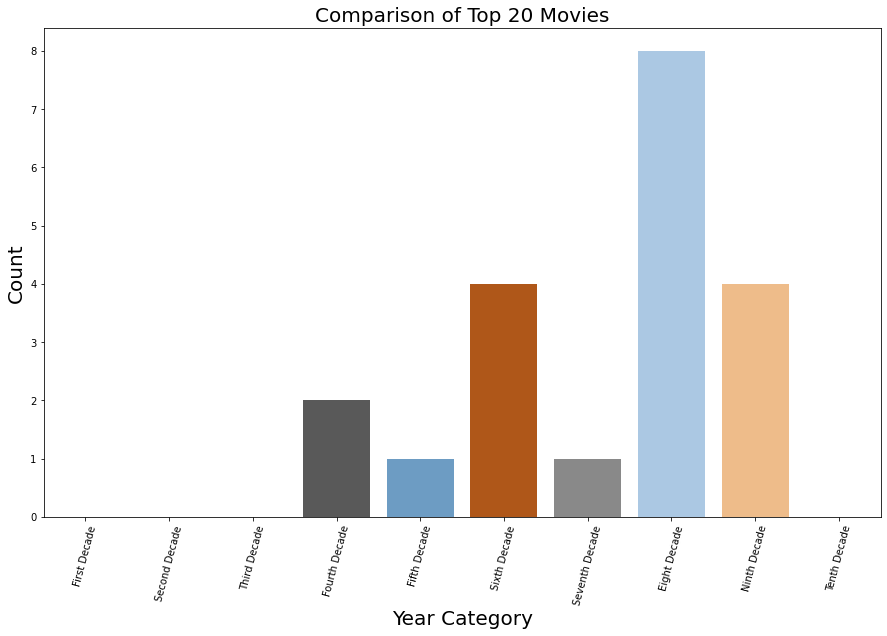

In [43]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data=Top_20, x='year_category')
plt.title('Comparison of Top 20 Movies', fontweight = 30, fontsize = 20)
plt.xlabel('Year Category', fontweight = 30, fontsize = 20)
plt.ylabel('Count', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

In [47]:
movie_rate = df[['movie_title', 'year', 'rating']]
movie_rate.head(10)

,movie_title,year,rating
0,The Shawshank Redemption,1994,9.22
1,The Godfather,1972,9.15
2,The Godfather: Part II,1974,8.98
3,The Dark Knight,2008,8.97
4,12 Angry Men,1957,8.94
5,Schindler's List,1993,8.91
6,The Lord of the Rings: The Return of the King,2003,8.89
7,Pulp Fiction,1994,8.84
8,"Il buono, il brutto, il cattivo",1966,8.79
9,The Lord of the Rings: The Fellowship of the ...,2001,8.78
